In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('C:\\Users\\Anna\\Desktop\\Python Programming Course\\Course Materials\\P4-Movie-Ratings.csv')

In [3]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


### Joint Plots

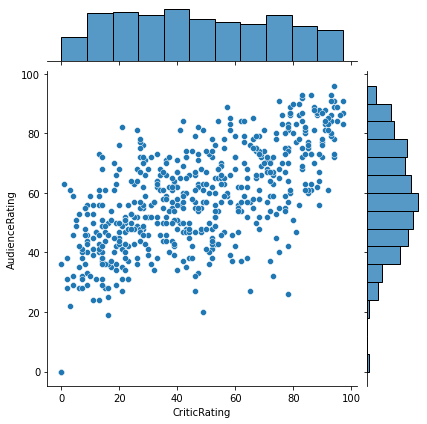

In [6]:
# Joint plots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

# how to read a joint plot? a scatter plot that shows the relationship between the x and y
# distributions on top and right, the distribution of individual variables, normal or uniform distrubution

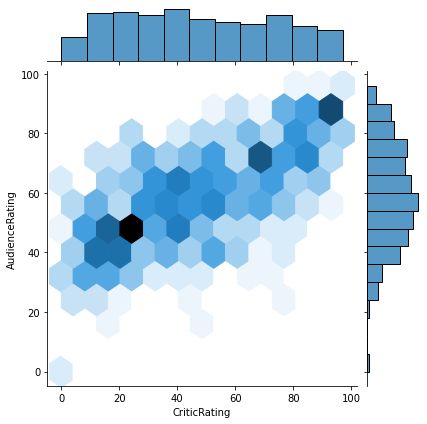

In [7]:
# Joint plots with changing styles
j1 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating',kind ='hex')

In [8]:
#<<< chart 1

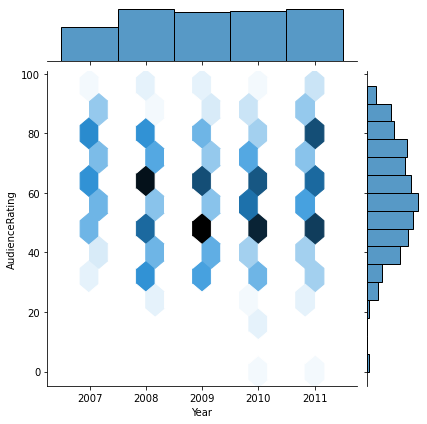

In [10]:
j2 = sns.jointplot(data=movies, x='Year', y='AudienceRating',kind ='hex')

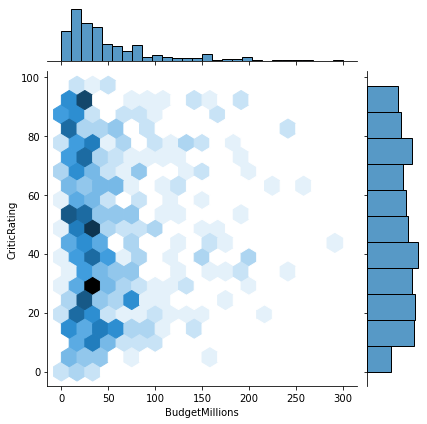

In [14]:
j3 = sns.jointplot(data=movies, y='CriticRating', x= 'BudgetMillions', kind='hex')

---

### Histograms

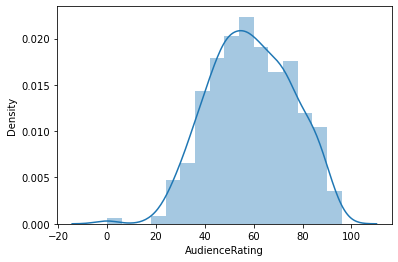

In [15]:
# We know this already

m1 = sns.distplot(movies.AudienceRating)

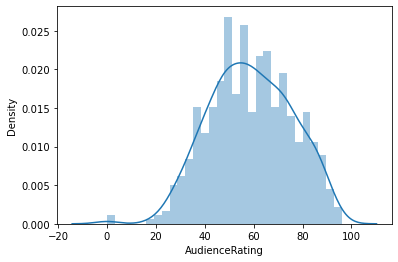

In [16]:

m1 = sns.distplot(movies.AudienceRating, bins = 30)

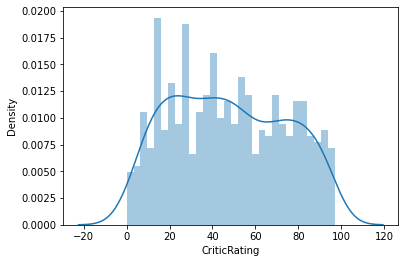

In [18]:

m2 = sns.distplot(movies.CriticRating, bins = 30)

In [ ]:
# chart 2

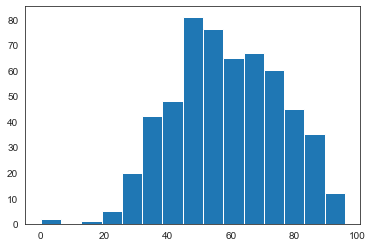

In [21]:
sns.set_style('white')  # see the original pyplot, instead of seaborn version
n1 = plt.hist(movies.AudienceRating, bins=15)

In [ ]:
# chart 3

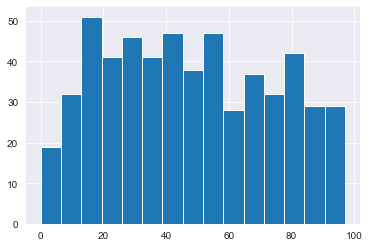

In [23]:
sns.set_style('darkgrid') #changing back to seaborn style with grid
n2 = plt.hist(movies.CriticRating, bins=15)

In [ ]:
# the critics and the audience are not looking at movies the same way

### Stacked Histograms in Python

(array([237., 162.,  75.,  28.,  17.,  20.,  13.,   3.,   3.,   1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

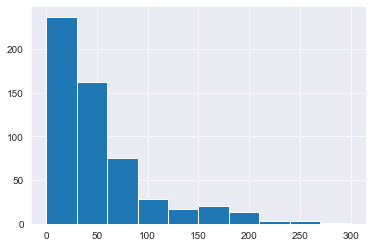

In [26]:

h1 = plt.hist(movies.BudgetMillions)
h1

In [29]:
# let's add filter
movies[movies.Genre=='Drama'].BudgetMillions


10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

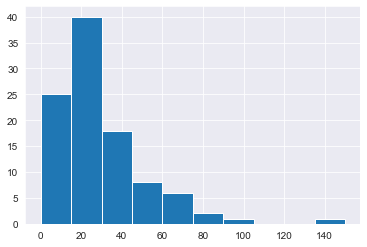

In [30]:
# let's add filter to the chart
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions)
plt.show()

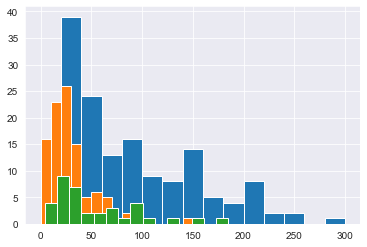

In [34]:
# let's add filter to the chart, for Action and Thriller
# the bars are hiding behind each other
plt.hist(movies[movies.Genre=='Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre=='Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre=='Thriller'].BudgetMillions, bins = 15)
plt.show()

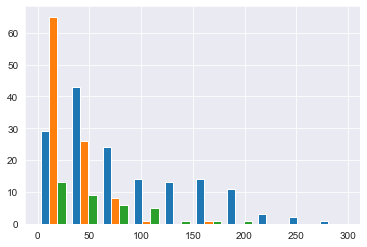

In [35]:
# instead, pass a list of columns
plt.hist([movies[movies.Genre=='Action'].BudgetMillions, movies[movies.Genre=='Drama'].BudgetMillions, movies[movies.Genre=='Thriller'].BudgetMillions])
plt.show()

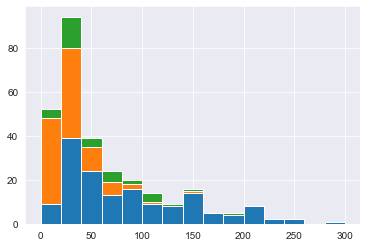

In [37]:
# then stack them
plt.hist([movies[movies.Genre=='Action'].BudgetMillions, movies[movies.Genre=='Drama'].BudgetMillions, movies[movies.Genre=='Thriller'].BudgetMillions], bins = 15, stacked=True)
plt.show()

In [39]:
# but there are way more genres than 3, it is way too tedious!
# use loops, automate it!

# so, we need to iterate the Genres
# remember, this needs the Genre as a category!

for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


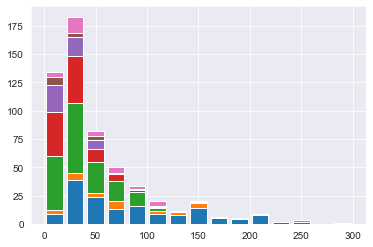

In [47]:
# this is a programming challenge, not a data science challenge
# need to create an empty list first

list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)       
    
h4 = plt.hist(list1, bins = 15, stacked = True, rwidth = 0.8)  # rwidth = 1 is 100% of the space is for the bars, thus no space between bars



In [48]:
# now we need a legend, or labels

In [ ]:
# chart 4

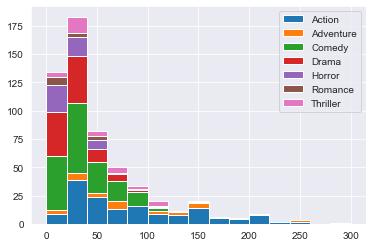

In [51]:
# add a new list for the labels

list1 = list()
labels1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)       
    labels1.append(gen)
    
h4 = plt.hist(list1, bins = 15, stacked = True, rwidth = 1, label = labels1) 
plt.legend()
plt.show()

### KDE Plot (Kernel Density Estimation Plot)

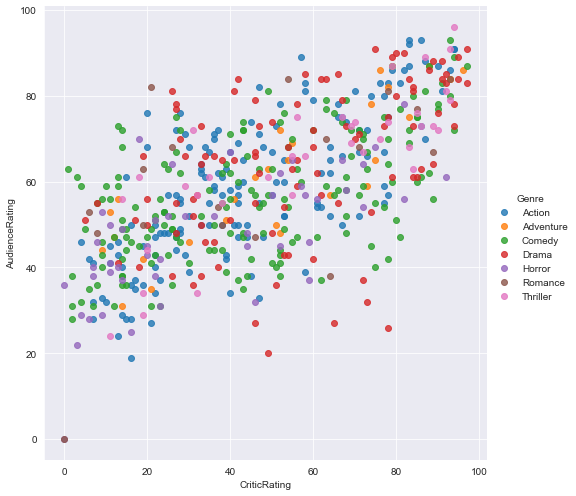

In [56]:
# previously, on scatter plots..

vis1 = sns.lmplot(data=movies, x = 'CriticRating', y='AudienceRating', fit_reg=False, hue = 'Genre', size = 7, aspect = 1)

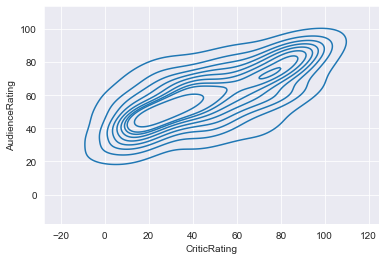

In [58]:
# Seaborn is good for some of the complex stuff that it has the tools for, if no tools, then even the simple stuff can be cumbersome
# so let's look at kde plot

k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

# same a sabove, but in kernel density, where the data is the heaviest/most dense

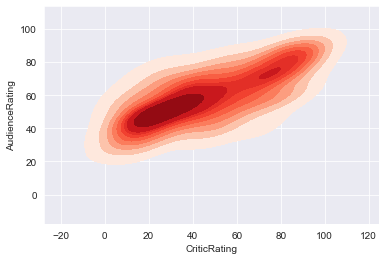

In [61]:
# let's make it cooler
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest= False, cmap='Reds')

# Tip: to get rid of the rough edges, combine the above and below together
# k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

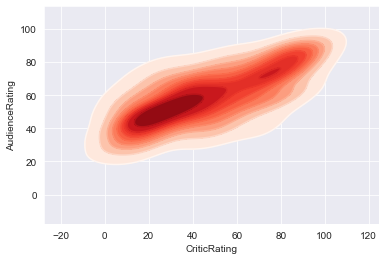

In [64]:
# like this: 
# looks more professional, and smoother, no?

k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest= False, cmap='Reds')


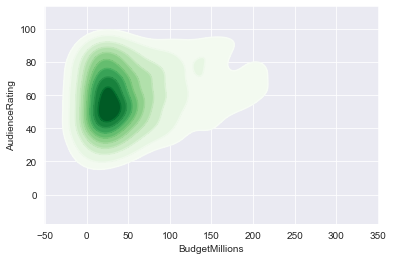

In [69]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='Greens')
k2a = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade = True, shade_lowest= False, cmap='Greens')

# looks like have to becareful around the numbers that cannot be negative, like budgets
# the density doesn't make sense here at all